# Read Astropy tables on PSF

- creation June 30th 2016
- author Sylvie Dagoret-Campagne
- Update July 6th 2016


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

from astropy.table import Table
from astropy.table import Column

import pandas as pd

In [2]:
intputtablefile1='HD158485_grat_1-25_TablePSF.fits'

In [3]:
 t1 = Table.read(intputtablefile1)

In [4]:
t1

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
int32,str28,str23,float64,int32,float64,float64,float64,float64
0,AssScImHD158485_grat_1.fits,2016-05-10T08:16:06.228,1.0,21,4.51917437069,4.41227611476,0.714686734982,0.470638109358
1,AssScImHD158485_grat_2.fits,2016-05-10T08:17:42.514,1.5,15,4.37330406145,4.55735594953,0.724104853084,0.439038971578
2,AssScImHD158485_grat_3.fits,2016-05-10T08:20:57.045,1.5,12,4.63608968996,4.14849632127,0.368357486235,0.460349718574
3,AssScImHD158485_grat_4.fits,2016-05-10T08:21:03.531,1.5,23,4.63124096986,4.31863744567,0.427319048562,0.422820799627
4,AssScImHD158485_grat_5.fits,2016-05-10T08:21:09.092,1.5,19,4.82428803566,4.2211565421,0.618518011995,0.492391423441
5,AssScImHD158485_grat_6.fits,2016-05-10T10:37:40.318,1.5,18,4.53751815256,4.16726183081,0.341235964668,0.349962604607
6,AssScImHD158485_grat_7.fits,2016-05-10T10:38:22.323,1.5,14,4.51257238741,4.4991794035,0.421523140932,0.37097916161
7,AssScImHD158485_grat_8.fits,2016-05-10T10:38:57.336,1.5,11,4.38819420274,4.442448533,0.308672418031,0.262399443441
8,AssScImHD158485_grat_9.fits,2016-05-10T10:39:04.394,1.5,25,4.68053308095,4.44502209162,0.379893380493,0.444990478455


In [5]:
df1=t1.to_pandas()

In [6]:
df1.describe() # pandas able to show statistics

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,25.000000,25.00,25.000000,25.000000,25.000000,25.000000,25.000000
mean,12.000000,1.48,20.120000,4.501416,4.345221,0.498199,0.412205
std,7.359801,0.10,4.719816,0.173333,0.179147,0.132740,0.104753
min,0.000000,1.00,11.000000,4.148797,3.663572,0.308672,0.210265
25%,6.000000,1.50,18.000000,4.373304,4.304302,0.421523,0.367556
50%,12.000000,1.50,21.000000,4.509932,4.409222,0.470657,0.417392
75%,18.000000,1.50,24.000000,4.631241,4.456345,0.561964,0.460350
max,24.000000,1.50,30.000000,4.824288,4.557356,0.873762,0.781951


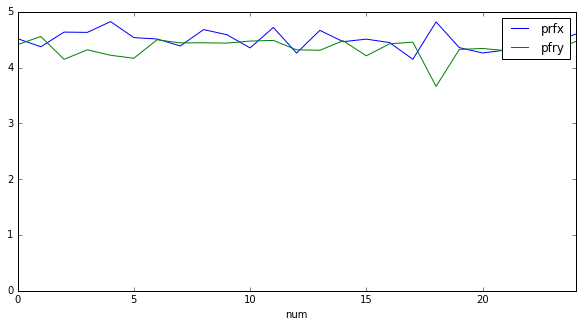

In [7]:
plt.figure(figsize=(10,6))
df1_2=df1[['num', 'prfx','pfry']]
df1_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()

In [8]:
df1_no_missing = df1.dropna()

In [9]:
df1_no_missing.describe()

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,25.000000,25.00,25.000000,25.000000,25.000000,25.000000,25.000000
mean,12.000000,1.48,20.120000,4.501416,4.345221,0.498199,0.412205
std,7.359801,0.10,4.719816,0.173333,0.179147,0.132740,0.104753
min,0.000000,1.00,11.000000,4.148797,3.663572,0.308672,0.210265
25%,6.000000,1.50,18.000000,4.373304,4.304302,0.421523,0.367556
50%,12.000000,1.50,21.000000,4.509932,4.409222,0.470657,0.417392
75%,18.000000,1.50,24.000000,4.631241,4.456345,0.561964,0.460350
max,24.000000,1.50,30.000000,4.824288,4.557356,0.873762,0.781951


## Now use the number in the filename to overwrite the num

In [10]:
import re  # use regular expression to extract the file number

In [12]:
filenames_df1=df1['file']

In [13]:
NB_OF_FILES_df1=len(filenames_df1)

In [15]:
filenumber_df1=np.zeros(NB_OF_FILES_df1,dtype='i4')

In [16]:
for id,file in enumerate(filenames_df1):
    filenumber_df1[id]=int( re.findall('^AssScImHD158485_grat_([0-9]+)',file)[0])

In [17]:
filenumber_df1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25], dtype=int32)

In [18]:
df1_3=df1

In [19]:
df1_3['num']=filenumber_df1

In [20]:
df1_3

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,1,AssScImHD158485_grat_1.fits,2016-05-10T08:16:06.228,1.0,21,4.519174,4.412276,0.714687,0.470638
1,2,AssScImHD158485_grat_2.fits,2016-05-10T08:17:42.514,1.5,15,4.373304,4.557356,0.724105,0.439039
2,3,AssScImHD158485_grat_3.fits,2016-05-10T08:20:57.045,1.5,12,4.636090,4.148496,0.368357,0.460350
3,4,AssScImHD158485_grat_4.fits,2016-05-10T08:21:03.531,1.5,23,4.631241,4.318637,0.427319,0.422821
4,5,AssScImHD158485_grat_5.fits,2016-05-10T08:21:09.092,1.5,19,4.824288,4.221157,0.618518,0.492391
5,6,AssScImHD158485_grat_6.fits,2016-05-10T10:37:40.318,1.5,18,4.537518,4.167262,0.341236,0.349963
6,7,AssScImHD158485_grat_7.fits,2016-05-10T10:38:22.323,1.5,14,4.512572,4.499179,0.421523,0.370979
7,8,AssScImHD158485_grat_8.fits,2016-05-10T10:38:57.336,1.5,11,4.388194,4.442449,0.308672,0.262399
8,9,AssScImHD158485_grat_9.fits,2016-05-10T10:39:04.394,1.5,25,4.680533,4.445022,0.379893,0.444990
9,10,AssScImHD158485_grat_10.fits,2016-05-10T10:39:10.033,1.5,24,4.590685,4.439177,0.455863,0.329728


In [21]:
full_dataset=df1_3

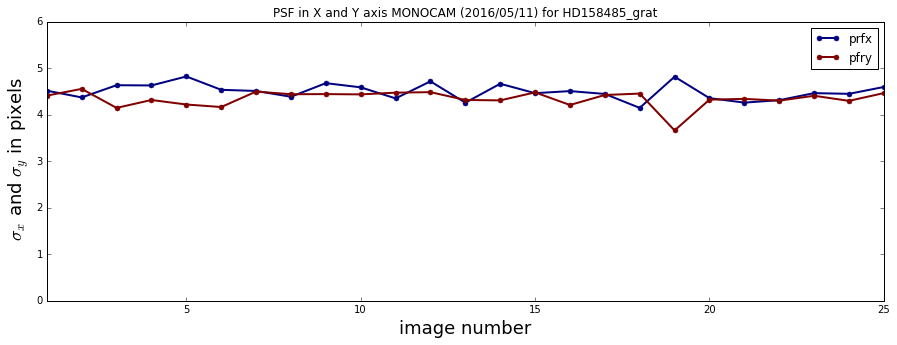

In [22]:
fig = plt.figure()
full_dataset_2=full_dataset[['num', 'prfx','pfry']]
ax=full_dataset_2.plot('num',['prfx','pfry'],lw=2,colormap='jet',marker='.',markersize=10,title='PSF in X and Y axis MONOCAM (2016/05/11) for HD158485_grat',ylim=(0.,6.),figsize=(15,5))
ax.set_xlabel("image number",fontsize=18)
ax.set_ylabel(" $\sigma_x$ and $\sigma_y$ in pixels",fontsize=18)
title='PSF in X and Y axis MONOCAM (2016/05/09) for HD158485_grat'
fig.suptitle(title, fontsize=20)
plt.legend(loc='upper right')

fig.savefig('PRFXY_HD158485_grat_20160509.jpg')
plt.show()  # pandas able to remove NaN



In [23]:
PixToArcsec=0.944

In [24]:
sigmax=full_dataset['prfx']*PixToArcsec

In [25]:
series_sigmax=pd.Series(sigmax)

In [26]:
sigmay=full_dataset['pfry']*PixToArcsec

In [27]:
series_sigmay=pd.Series(sigmay)

In [28]:
full_dataset

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,1,AssScImHD158485_grat_1.fits,2016-05-10T08:16:06.228,1.0,21,4.519174,4.412276,0.714687,0.470638
1,2,AssScImHD158485_grat_2.fits,2016-05-10T08:17:42.514,1.5,15,4.373304,4.557356,0.724105,0.439039
2,3,AssScImHD158485_grat_3.fits,2016-05-10T08:20:57.045,1.5,12,4.636090,4.148496,0.368357,0.460350
3,4,AssScImHD158485_grat_4.fits,2016-05-10T08:21:03.531,1.5,23,4.631241,4.318637,0.427319,0.422821
4,5,AssScImHD158485_grat_5.fits,2016-05-10T08:21:09.092,1.5,19,4.824288,4.221157,0.618518,0.492391
5,6,AssScImHD158485_grat_6.fits,2016-05-10T10:37:40.318,1.5,18,4.537518,4.167262,0.341236,0.349963
6,7,AssScImHD158485_grat_7.fits,2016-05-10T10:38:22.323,1.5,14,4.512572,4.499179,0.421523,0.370979
7,8,AssScImHD158485_grat_8.fits,2016-05-10T10:38:57.336,1.5,11,4.388194,4.442449,0.308672,0.262399
8,9,AssScImHD158485_grat_9.fits,2016-05-10T10:39:04.394,1.5,25,4.680533,4.445022,0.379893,0.444990
9,10,AssScImHD158485_grat_10.fits,2016-05-10T10:39:10.033,1.5,24,4.590685,4.439177,0.455863,0.329728


### simply add series as columns in the dataset

In [29]:
full_dataset['sigmax'] = series_sigmax

In [30]:
full_dataset['sigmay'] = series_sigmay

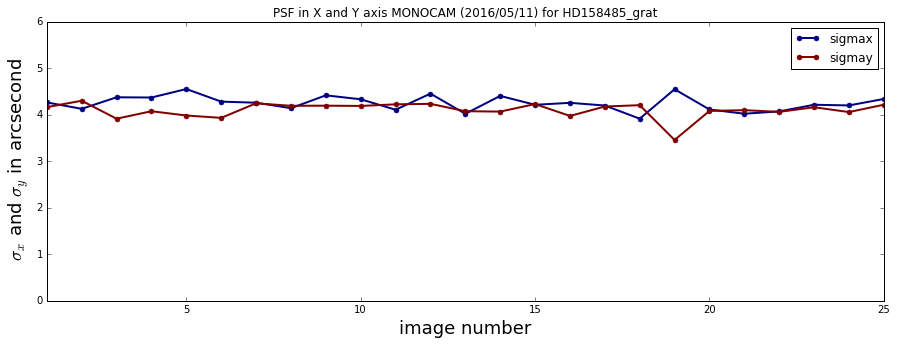

In [31]:
fig = plt.figure()
full_dataset_3=full_dataset[['num', 'sigmax','sigmay']]
ax=full_dataset_3.plot('num',['sigmax','sigmay'],lw=2,colormap='jet',marker='.',markersize=10,title='PSF in X and Y axis MONOCAM (2016/05/11) for HD158485_grat',ylim=(0.,6.),figsize=(15,5))
ax.set_xlabel("image number",fontsize=18)
ax.set_ylabel(" $\sigma_x$ and $\sigma_y$ in arcsecond",fontsize=18)
title='PSF in X and Y axis MONOCAM (2016/05/09) for HD158485_grat'
fig.suptitle(title, fontsize=20)
plt.legend(loc='upper right')
plt.show()  # pandas able to remove NaN
fig.savefig('PSFXY_HD158485_grat_20160509.jpg')

In [32]:
output_table=Table.from_pandas(full_dataset)

In [33]:
output_table

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay
int32,str28,str23,float64,int32,float64,float64,float64,float64,float64,float64
1,AssScImHD158485_grat_1.fits,2016-05-10T08:16:06.228,1.0,21,4.51917437069,4.41227611476,0.714686734982,0.470638109358,4.26610060593,4.16518865233
2,AssScImHD158485_grat_2.fits,2016-05-10T08:17:42.514,1.5,15,4.37330406145,4.55735594953,0.724104853084,0.439038971578,4.12839903401,4.30214401636
3,AssScImHD158485_grat_3.fits,2016-05-10T08:20:57.045,1.5,12,4.63608968996,4.14849632127,0.368357486235,0.460349718574,4.37646866733,3.91618052728
4,AssScImHD158485_grat_4.fits,2016-05-10T08:21:03.531,1.5,23,4.63124096986,4.31863744567,0.427319048562,0.422820799627,4.37189147555,4.07679374871
5,AssScImHD158485_grat_5.fits,2016-05-10T08:21:09.092,1.5,19,4.82428803566,4.2211565421,0.618518011995,0.492391423441,4.55412790566,3.98477177574
6,AssScImHD158485_grat_6.fits,2016-05-10T10:37:40.318,1.5,18,4.53751815256,4.16726183081,0.341235964668,0.349962604607,4.28341713601,3.93389516829
7,AssScImHD158485_grat_7.fits,2016-05-10T10:38:22.323,1.5,14,4.51257238741,4.4991794035,0.421523140932,0.37097916161,4.25986833371,4.24722535691
8,AssScImHD158485_grat_8.fits,2016-05-10T10:38:57.336,1.5,11,4.38819420274,4.442448533,0.308672418031,0.262399443441,4.14245532739,4.19367141515
9,AssScImHD158485_grat_9.fits,2016-05-10T10:39:04.394,1.5,25,4.68053308095,4.44502209162,0.379893380493,0.444990478455,4.41842322842,4.19610085449


In [34]:
outputtablefile='HD158485_grat_1-25_TablePSF_night20160509.fits'
output_table.write(outputtablefile,format='fits')

In [35]:
t2 = Table.read(outputtablefile)

In [36]:
t2

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay
int32,str28,str23,float64,int32,float64,float64,float64,float64,float64,float64
1,AssScImHD158485_grat_1.fits,2016-05-10T08:16:06.228,1.0,21,4.51917437069,4.41227611476,0.714686734982,0.470638109358,4.26610060593,4.16518865233
2,AssScImHD158485_grat_2.fits,2016-05-10T08:17:42.514,1.5,15,4.37330406145,4.55735594953,0.724104853084,0.439038971578,4.12839903401,4.30214401636
3,AssScImHD158485_grat_3.fits,2016-05-10T08:20:57.045,1.5,12,4.63608968996,4.14849632127,0.368357486235,0.460349718574,4.37646866733,3.91618052728
4,AssScImHD158485_grat_4.fits,2016-05-10T08:21:03.531,1.5,23,4.63124096986,4.31863744567,0.427319048562,0.422820799627,4.37189147555,4.07679374871
5,AssScImHD158485_grat_5.fits,2016-05-10T08:21:09.092,1.5,19,4.82428803566,4.2211565421,0.618518011995,0.492391423441,4.55412790566,3.98477177574
6,AssScImHD158485_grat_6.fits,2016-05-10T10:37:40.318,1.5,18,4.53751815256,4.16726183081,0.341235964668,0.349962604607,4.28341713601,3.93389516829
7,AssScImHD158485_grat_7.fits,2016-05-10T10:38:22.323,1.5,14,4.51257238741,4.4991794035,0.421523140932,0.37097916161,4.25986833371,4.24722535691
8,AssScImHD158485_grat_8.fits,2016-05-10T10:38:57.336,1.5,11,4.38819420274,4.442448533,0.308672418031,0.262399443441,4.14245532739,4.19367141515
9,AssScImHD158485_grat_9.fits,2016-05-10T10:39:04.394,1.5,25,4.68053308095,4.44502209162,0.379893380493,0.444990478455,4.41842322842,4.19610085449
